In [2]:
import numpy as np
from scipy.signal import convolve

In [3]:
import csv

In [3]:
with open('4v4-DDPG-predator.csv', 'r') as f:
    reader = csv.reader(f)
    index = []
    DDPG_predator = []
    for i, j in enumerate(list(reader)):
        if i>0:
            index.append(int(j[1]))
            DDPG_predator.append(float(j[2]))

In [4]:
print(len(DDPG_predator))
#print(DDPG_predator)
DDPG_predator[0:10]

1000


[0.0, 0.0, 0.0, 0.0, 20.0, 40.0, 10.0, 0.0, 0.0, 0.0]

In [5]:
def smoothing(data, window_len=20):
    data_smooth = []
    for i,j in enumerate(data):
        index_left = i - int(window_len / 2) if (i - int(window_len / 2)) >= 0 else 0
        index_right = i + int(window_len / 2) if (i + int(window_len / 2)) < len(data) else len(data) -1
        data_smooth.append(sum(data[index_left:index_right])/window_len)
    return data_smooth

In [6]:
DDPG_predator_smoothing = smoothing(DDPG_predator, 50)

In [7]:
#print(DDPG_predator_smoothing)
print(index[:10])

[43, 95, 168, 230, 235, 274, 311, 319, 475, 537]


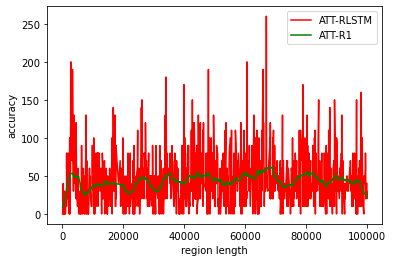

In [8]:
import matplotlib.pyplot as plt
plt.plot(index, DDPG_predator,color = 'r',label="ATT-RLSTM")
plt.plot(index, DDPG_predator_smoothing, color = 'g',label="ATT-R1")
plt.xlabel("region length")#横坐标名字
plt.ylabel("accuracy")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

1000


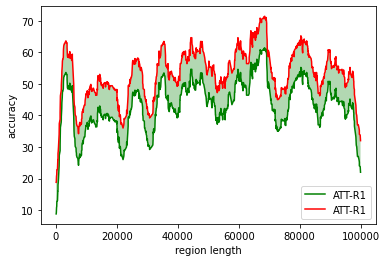

In [9]:
y1 = DDPG_predator_smoothing
y2 = [a +10 for a in DDPG_predator_smoothing]
print(len(y2))
plt.figure()
plt.plot(index, y1, color = 'g',label="ATT-R1")
plt.plot(index, y2, color = 'r', label="ATT-R1")
plt.xlabel("region length")#横坐标名字
plt.ylabel("accuracy")#纵坐标名字
plt.legend(loc = "best")#图例
plt.fill_between(index, y1, y2, facecolor='g' ,alpha=0.3)
plt.savefig(f'./test.pdf')
plt.show()

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid") #这是seaborn默认的风格

Text(0, 0.5, 'reward')

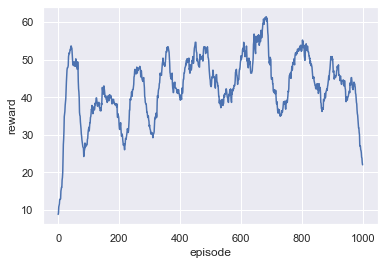

In [11]:
sns.lineplot(data=DDPG_predator_smoothing, ci=10)
plt.xlabel("episode")#横坐标名字
plt.ylabel("reward")#纵坐标名字

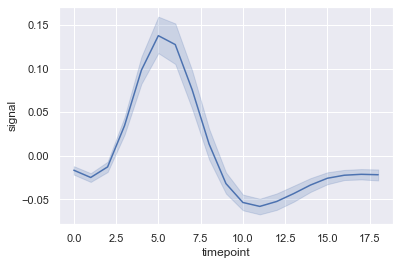

In [12]:
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal", ci=80, data=fmri)
#ax1 = sns.lineplot(data=fmri["signal"])

In [102]:
# data = pd.read_csv(filepath_or_buffer='4v4-DDPG-predator.csv')
data = pd.read_csv('./训练曲线数据/coverage_N3/run-0_logs-tag-agent0_training_reward.csv')

In [103]:
data

,Wall time,Step,Value
0,1.599899e+09,0,-3.305571
1,1.599899e+09,10,-1.946836
2,1.599899e+09,30,-1.534405
3,1.599899e+09,40,-1.543614
4,1.600044e+09,50,-1.577982
...,...,...,...
995,1.600127e+09,10540,-0.944648
996,1.600127e+09,10550,-0.950637
997,1.600127e+09,10560,-1.002841
998,1.600127e+09,10570,-0.809505


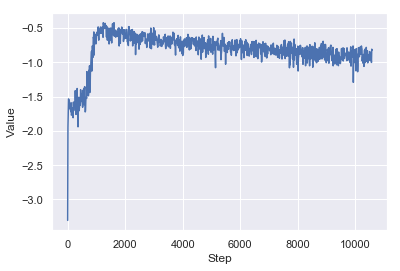

In [104]:
ax = sns.lineplot(x="Step", y="Value", data=data)


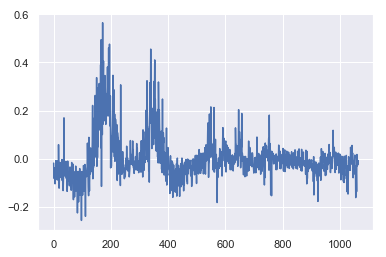

In [106]:
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(data=fmri['signal'])
#ax1 = sns.lineplot(data=fmri["signal"])


In [34]:
#导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid") #这是seaborn默认的风格
#数据处理方法
#1、数据的smooth方法
def smooth(data, sm=10):
    '''
    :param data:
    :param sm: sm表示滑动窗口大小,为2*k+1,
    :return: smooth data
    '''
    smooth_data = []
    if sm > 1:
        for d in data:
            y = np.ones(sm)*1.0/sm
            d = np.convolve(y, d, "same")
            smooth_data.append(d)
    return smooth_data

def smoothing(data, sm=20):
    '''
    :param data:
    :param sm: sm表示滑动窗口大小,
    :return: smooth data
    '''
    data_smooth = []
    for i,j in enumerate(data):
        index_left = i - int(sm / 2) if (i - int(sm / 2)) >= 0 else 0
        index_right = i + int(sm / 2) if (i + int(sm / 2)) < len(data) else len(data) -1
        data_smooth.append(sum(data[index_left:index_right])/len(data[index_left:index_right]))
    return data_smooth

#2、数据max min mean
def get_max_min_mean(data, sm):
    '''
    :param data:
    :param sm:
    :return:
    '''
    data_max = []
    data_min = []
    data_mean = []
    for i,j in enumerate(data):
        index_left = i - int(sm / 2) if (i - int(sm / 2)) >= 0 else 0
        index_right = i + int(sm / 2) if (i + int(sm / 2)) < len(data) else len(data) -1
        data_max.append(max(data[index_left:index_right]))
        data_min.append(min(data[index_left:index_right]))
        data_mean.append(sum(data[index_left:index_right])/len(data[index_left:index_right]))
    return data_max, data_min, data_mean

In [37]:
#画一条线的line和scale
def draw_line(data_file, label, color, max_min_mean_sm=6, smooth_sm=40):
    #数据处理
    #Wall time	Step	Value
    data = pd.read_csv(filepath_or_buffer=data_file)
    #DDPG_predator_4.head(10)
    # data_x = data['Step']
    data_x = data['Step'][0:600]
    # data_y = data['Value']
    data_y = data['Value'][0:600]

    data_max_y, data_min_y, data_mean_y \
        = get_max_min_mean(data_y, sm=max_min_mean_sm)

    data_max_smooth_y = smoothing(data=data_max_y, sm=smooth_sm)
    data_min_smooth_y = smoothing(data=data_min_y, sm=smooth_sm)
    data_mean_smooth_y = smoothing(data=data_mean_y, sm=smooth_sm)
    #print(data_mean_y)
    #画图
    plt.plot(data_x, data_mean_smooth_y, color = color, label=label, linewidth='2')

    plt.fill_between(data_x,
                     data_min_smooth_y,
                     data_mean_smooth_y,
                     facecolor=color,
                     alpha=0.3)
    plt.fill_between(data_x,
                     data_mean_smooth_y,
                     data_max_smooth_y,
                     facecolor=color,
                     alpha=0.3)

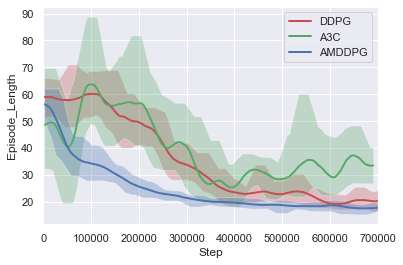

In [38]:
plt.figure()
data_files_path = [r'D:\experiment_data\amddpg_ddpg_a3c_episodelength\run-roller1_SimpleRoller-tag-Environment_Episode Length.csv',
                   r'D:\experiment_data\amddpg_ddpg_a3c_episodelength\run-roller2_SimpleRoller-tag-Environment_Episode Length.csv',
                   r'D:\experiment_data\amddpg_ddpg_a3c_episodelength\run-roller3_SimpleRoller-tag-Environment_Episode Length.csv'
                   ]
labels = ['DDPG',
          'A3C',
          'AMDDPG'
          ]
# colors = ['g', 'c', 'b', 'r']
colors = ['r','g','b']
# smooth_sms = [80, 80, 80, 80]
smooth_sms = [10,10,10]

for data_file_path, label, color, smooth_sm in zip(data_files_path, labels, colors, smooth_sms):
    draw_line(data_file=data_file_path,
              label=label,
              color=color,
              max_min_mean_sm=20,
              smooth_sm=smooth_sm)

#figure的具体设置需要在直线等画完了在进行
plt.xlabel("Step")#横坐标名字
plt.ylabel("Episode_Length")#纵坐标名字
#plt.legend(loc="best")#图例
plt.legend(loc="best")#图例
# plt.ylim(-3.5, 0)
plt.xlim(0, 700000)
plt.savefig("Enpisode_Length.png",dpi=500)
plt.show()


In [18]:
print("helloworld")


helloworld
